In [116]:
import numpy as np
from matplotlib import pyplot as plt

print('hello brave explorers!')

X0 = 0
Y0 = 0
T0 = 20
stnum = 15

hello brave explorers!


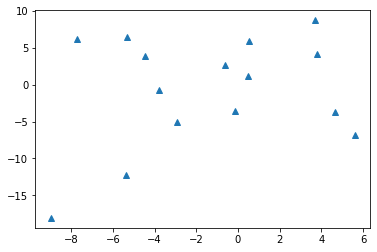

In [117]:
Xs = X0 + 4*np.sqrt(2)*np.random.randn(stnum)
Ys = Y0 + 4*np.sqrt(2)*np.random.randn(stnum)

plt.plot(Xs, Ys, '^')

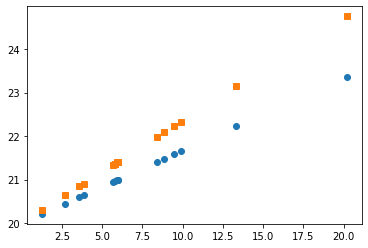

In [118]:
Ds = np.sqrt(Xs**2+Ys**2)
Vp = 6
Vs = 6/np.sqrt(2)
TsP = Ds/Vp + T0
TsS = Ds/Vs + T0

plt.plot(Ds, TsP, 'o')
plt.plot(Ds, TsS, 's')

In [119]:
# dataset is Xs, Ys, Ts

X1 = np.round(np.min(Xs))
X2 = np.round(np.max(Xs))
Y1 = np.round(np.min(Ys))
Y2 = np.round(np.max(Ys))

print('searching X: ', X1,X2)
print('searching Y: ', Y1,Y2)


searching X:  -9.0 6.0
searching Y:  -18.0 9.0


/var/folders/47/tjvsnggd3kv1n9bh802nx1pw00c6xl/T/ipykernel_49612/611165044.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  totalcombination = np.int(rX*rY)
/var/folders/47/tjvsnggd3kv1n9bh802nx1pw00c6xl/T/ipykernel_49612/611165044.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: ht

(array([129.,  95.,  41.,  24.,  21.,  18.,  18.,  16.,  14.,  13.,  10.,
          4.,   2.]),
 array([3.14945398e-29, 1.43086789e+00, 2.86173578e+00, 4.29260367e+00,
        5.72347155e+00, 7.15433944e+00, 8.58520733e+00, 1.00160752e+01,
        1.14469431e+01, 1.28778110e+01, 1.43086789e+01, 1.57395468e+01,
        1.71704147e+01, 1.86012825e+01]),
 <BarContainer object of 13 artists>)

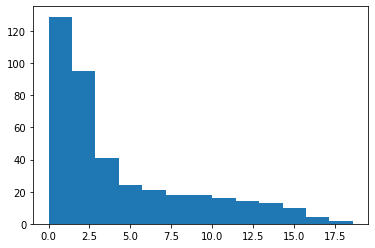

In [120]:
dX = 1
rX = X2-X1
dY = 1
rY = Y2-Y1

totalcombination = np.int(rX*rY)
Tmis = np.zeros((totalcombination,4),dtype = np.float)
#print(Tmis)
itry = 0
for ix in np.arange(X1,X2,dX):
    for iy in np.arange(Y1,Y2,dY):
        itotalmis = 0
        for istat in np.arange(0,stnum,1):
            iXs = Xs[istat]
            iYs = Ys[istat]
            idTs = TsS[istat] - TsP[istat]
            imis = np.sqrt((iXs-ix)**2+(iYs-iy)**2)*(1/Vs-1/Vp)  - idTs
            itotalmis = itotalmis + imis**2

        Tmis[itry,0] = ix
        Tmis[itry,1] = iy
        Tmis[itry,3] = itotalmis
        itry = itry + 1

plt.hist(Tmis[:,3], bins='auto')

In [121]:
idx = np.argmin(Tmis[:,3])
print(idx)
print( Tmis[idx,:])

261
[0.00000000e+00 0.00000000e+00 0.00000000e+00 3.14945398e-29]


In [122]:
X0_est = Tmis[idx,0]
Y0_est = Tmis[idx,1]
print(X0_est,Y0_est)
T1 = -10
T2 = np.round(np.min(TsP))
print('searching T: ', T1,T2)
dT = 1
rT = int(T2-T1)
Tmis2 = np.zeros((rT,2),dtype = np.float)
#print(Tmis)

0.0 0.0
searching T:  -10 20.0


/var/folders/47/tjvsnggd3kv1n9bh802nx1pw00c6xl/T/ipykernel_49612/2917326126.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Tmis2 = np.zeros((rT,2),dtype = np.float)


29
[19. 60.]


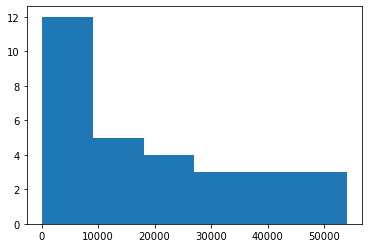

In [123]:
itry = 0

for it in np.arange(T1,T2,dT):
    itotalmis = 0
    for istat in np.arange(0,stnum,1):
         iXs = Xs[istat]
         iYs = Ys[istat]
         imis = np.sqrt((X0_est-iXs)**2+(Y0_est-iYs)**2)*(1/Vs+1/Vp)+2*it-TsS[istat]-TsP[istat]
         # print(X0_est,Y0_est)
         itotalmis = itotalmis + imis**2

    Tmis2[itry,0] = it
    Tmis2[itry,1] = itotalmis
    itry = itry + 1

plt.hist(Tmis2[:,1], bins='auto')
idx = np.argmin(Tmis2[:,1])
print(idx)
print( Tmis2[idx,:])